# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import pydotplus
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Data Loading

In [2]:
bf = pd.read_csv('dataset/bank-full.csv', sep=';')
bfless = pd.read_csv('dataset/bank.csv', sep=';')
bad = pd.read_csv('dataset/bank-additional-full.csv', sep=';')
badless = pd.read_csv('dataset/bank-additional.csv', sep=';')

In [3]:
bf.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [4]:
bfless.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [5]:
bad.head().head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
bad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

1. age, umur
2. job, Jenis pekerjaan (kategorikal: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown') 
3. marital: Status perkawinan (kategorikal: 'divorced', 'married', 'single', 'unknown'; catatan: 'divorced' berarti bercerai atau duda/janda)
4. education, Tingkat pendidikan (kategorikal: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown') 
5. default, Memiliki kredit macet? (kategorikal: 'no', 'yes', 'unknown') 
6. housing, Memiliki pinjaman perumahan? (kategorikal: 'no', 'yes', 'unknown')
7. loan, Memiliki pinjaman pribadi? (kategorikal: 'no', 'yes', 'unknown')
8. contact, Jenis komunikasi kontak (kategorikal: 'cellular', 'telephone')
9. month, Bulan terakhir kontak dalam setahun (kategorikal: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week, Hari dalam seminggu terakhir kontak (kategorikal: 'mon', 'tue', 'wed', 'thu', 'fri')
11. duration,  Durasi kontak terakhir, dalam detik (numerik). Harap diperhatikan bahwa atribut ini hanya untuk tujuan pembanding dan harus diabaikan jika tujuan model prediksi yang realistis.
12. campaign, Jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (numerik, termasuk kontak terakhir)
13. pdays , Jumlah hari setelah klien terakhir dihubungi dari kampanye sebelumnya (numerik; 999 berarti klien sebelumnya tidak dihubungi) 
14. previous, Jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (numerik) 
15. poutcome ,  Hasil dari kampanye pemasaran sebelumnya (kategorikal: 'failure', 'nonexistent', 'success')
16. emp.var.rate,  Indikator triwulanan tingkat variasi lapangan kerja (numerik)
17. cons.price.idx, Indikator bulanan indeks harga konsumen (numerik)
18. cons.conf.idx, Indikator bulanan indeks kepercayaan konsumen (numerik)
19. euribor3m,  Tingkat euribor 3 bulan: Indikator harian tingkat euribor 3 bulan (numerik)
20. nr.employed , Indikator triwulanan jumlah karyawan (numerik)
21. y, Apakah klien berlangganan deposito jangka? (biner: 'yes', 'no')      

In [7]:
bad.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
bf.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
badless.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
bfless.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Tidak terdapat missing values pada informasi diatas

## EDA

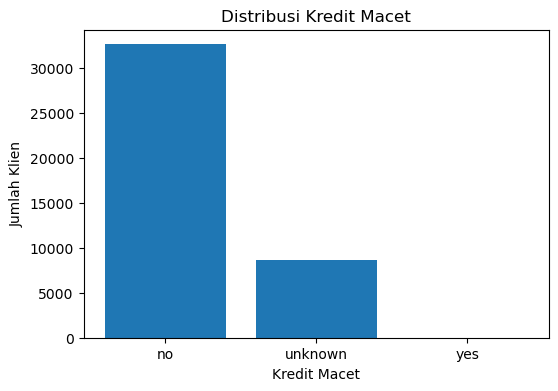

In [11]:
count_default = bad['default'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(count_default.index, count_default.values)
plt.xlabel('Kredit Macet')
plt.ylabel('Jumlah Klien')
plt.title('Distribusi Kredit Macet')
plt.show()

In [12]:
prop_default = bad['default'].value_counts(normalize=True)

# Menampilkan hasil
print(prop_default)

no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64


Berikut Proporsi yang mengalami kredit macet 
1. Orang yang tidak mengalami kredit macet ada sekitar 79%
2. Orang yang tidak tahu bahwa kredit macet sekitar 20%
3. Orang yang mengalami kredit macet 0.0073% yang mengalami kredit macet

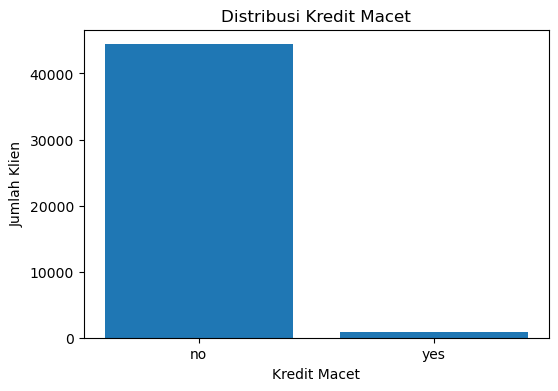

In [13]:
count_default = bf['default'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(count_default.index, count_default.values)
plt.xlabel('Kredit Macet')
plt.ylabel('Jumlah Klien')
plt.title('Distribusi Kredit Macet')
plt.show()

In [14]:
prop_default = bf['default'].value_counts(normalize=True)

# Menampilkan hasil
print(prop_default)

no     0.981973
yes    0.018027
Name: default, dtype: float64


Berikut Proporsi yang mengalami kredit macet 
1. Orang yang tidak mengalami kredit macet ada sekitar 98%
2. Orang yang mengalami kredit macet 2% yang mengalami kredit macet

Data untuk default:
              job  default  total
0          admin.       no   9129
1          admin.  unknown   1293
2     blue-collar       no   6088
3     blue-collar  unknown   3166
4    entrepreneur       no   1155
5    entrepreneur  unknown    301
6       housemaid       no    741
7       housemaid  unknown    319
8      management       no   2466
9      management  unknown    458
10        retired       no   1327
11        retired  unknown    393
12  self-employed       no   1139
13  self-employed  unknown    282
14       services       no   3053
15       services  unknown    916
16        student       no    771
17        student  unknown    104
18     technician       no   5765
19     technician  unknown    976
20     technician      yes      2
21     unemployed       no    776
22     unemployed  unknown    237
23     unemployed      yes      1
24        unknown       no    178
25        unknown  unknown    152

Data untuk housing:
              job  housing  total
0      

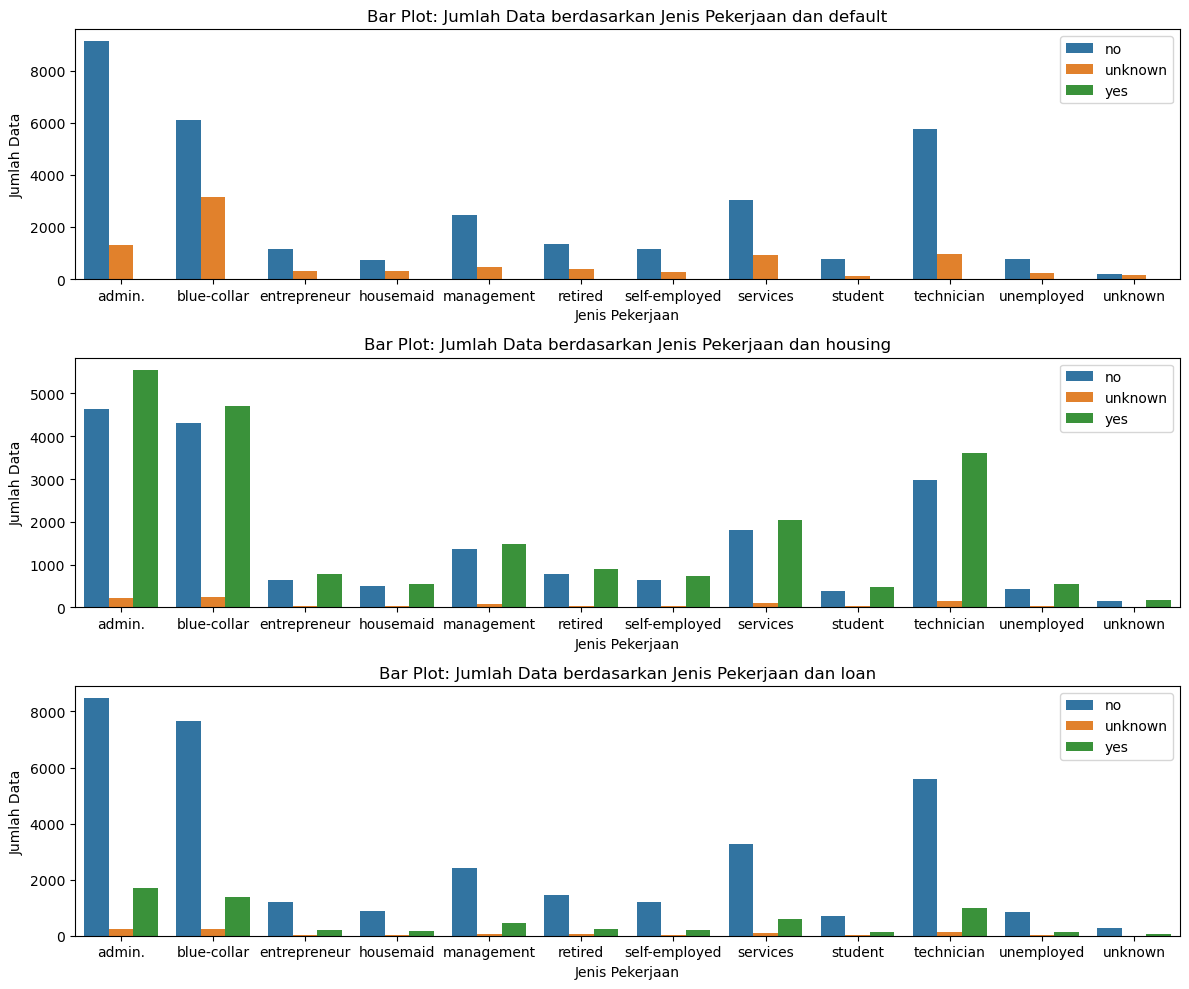

In [15]:
# Menentukan fitur-fitur yang akan digunakan dalam EDA
categorical_features = ['default', 'housing', 'loan']

# Membuat subplot untuk setiap fitur kategorikal
fig, axes = plt.subplots(len(categorical_features), 1, figsize=(12, 10))

# Loop melalui setiap fitur kategorikal
for i, feature in enumerate(categorical_features):
    # Menghitung jumlah data untuk setiap kombinasi jenis pekerjaan dan fitur kategorikal
    grouped_data = bad.groupby(['job', feature]).size().reset_index(name='total')

    # Menampilkan data yang digunakan dalam pembuatan bar plot
    print("Data untuk {}:".format(feature))
    print(grouped_data)
    print()

    # Membuat bar plot
    sns.barplot(x='job', y='total', hue=feature, data=grouped_data, ax=axes[i])
    axes[i].set_title('Bar Plot: Jumlah Data berdasarkan Jenis Pekerjaan dan {}'.format(feature))
    axes[i].set_xlabel('Jenis Pekerjaan')
    axes[i].set_ylabel('Jumlah Data')
    axes[i].legend()

# Menyesuaikan tata letak subplot
plt.tight_layout()

# Menampilkan plot
plt.show()


Data untuk default:
              job default  total
0          admin.      no   5097
1          admin.     yes     74
2     blue-collar      no   9531
3     blue-collar     yes    201
4    entrepreneur      no   1432
5    entrepreneur     yes     55
6       housemaid      no   1218
7       housemaid     yes     22
8      management      no   9294
9      management     yes    164
10        retired      no   2238
11        retired     yes     26
12  self-employed      no   1546
13  self-employed     yes     33
14       services      no   4079
15       services     yes     75
16        student      no    935
17        student     yes      3
18     technician      no   7467
19     technician     yes    130
20     unemployed      no   1273
21     unemployed     yes     30
22        unknown      no    286
23        unknown     yes      2

Data untuk housing:
              job housing  total
0          admin.      no   1989
1          admin.     yes   3182
2     blue-collar      no   2684
3 

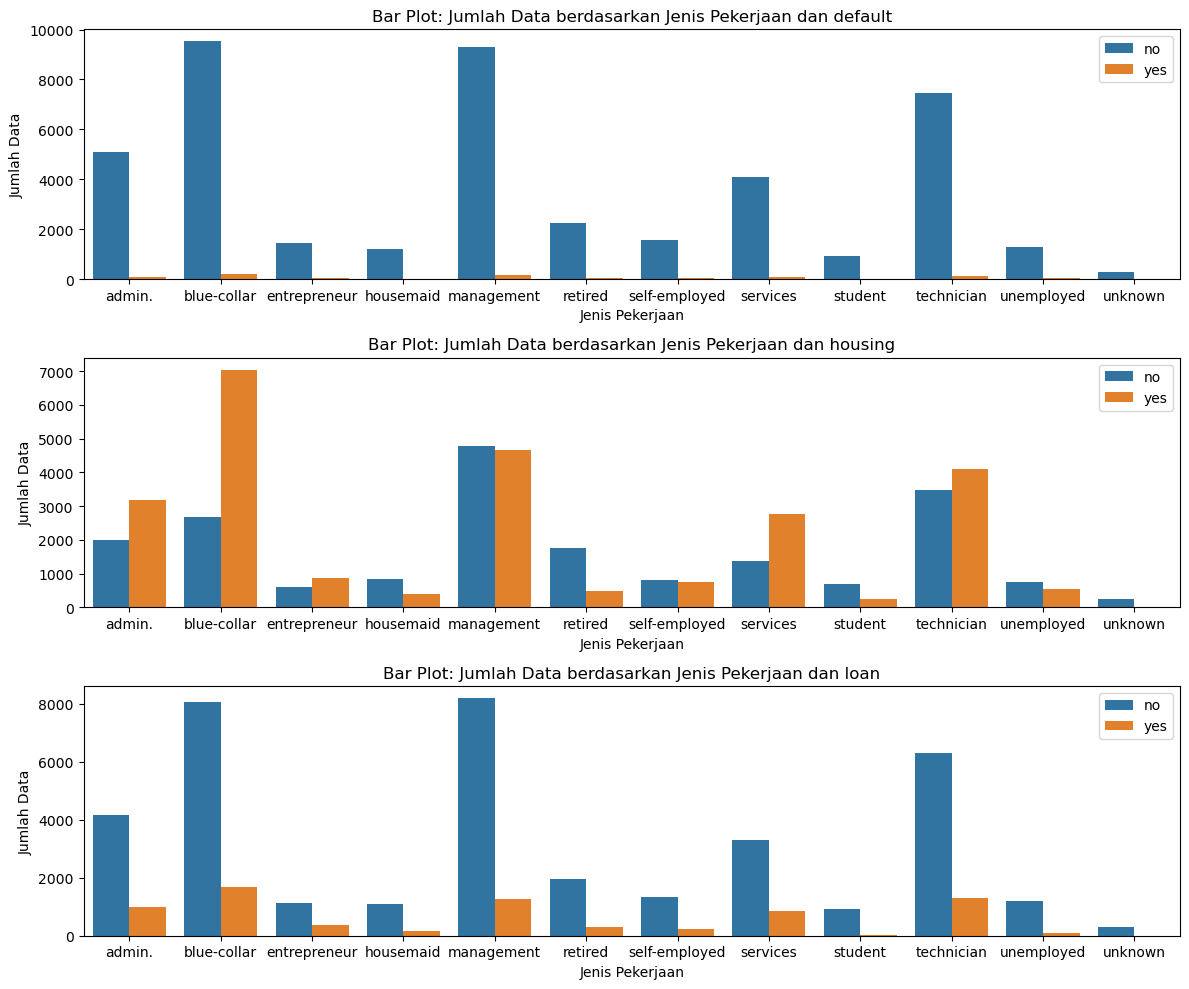

In [16]:
# Menentukan fitur-fitur yang akan digunakan dalam EDA
categorical_features = ['default', 'housing', 'loan']

# Membuat subplot untuk setiap fitur kategorikal
fig, axes = plt.subplots(len(categorical_features), 1, figsize=(12, 10))

# Loop melalui setiap fitur kategorikal
for i, feature in enumerate(categorical_features):
    # Menghitung jumlah data untuk setiap kombinasi jenis pekerjaan dan fitur kategorikal
    grouped_data = bf.groupby(['job', feature]).size().reset_index(name='total')

    # Menampilkan data yang digunakan dalam pembuatan bar plot
    print("Data untuk {}:".format(feature))
    print(grouped_data)
    print()

    # Membuat bar plot
    sns.barplot(x='job', y='total', hue=feature, data=grouped_data, ax=axes[i])
    axes[i].set_title('Bar Plot: Jumlah Data berdasarkan Jenis Pekerjaan dan {}'.format(feature))
    axes[i].set_xlabel('Jenis Pekerjaan')
    axes[i].set_ylabel('Jumlah Data')
    axes[i].legend()

# Menyesuaikan tata letak subplot
plt.tight_layout()

# Menampilkan plot
plt.show()


Jumlah Kelas 'yes': 4640
Jumlah Kelas 'no': 36548
Persentase Kelas 'yes': 11.27 %
Persentase Kelas 'no': 88.73 %


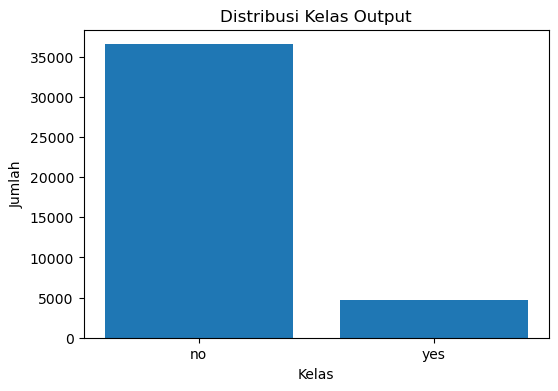

In [17]:
# Menghitung jumlah kelas 'yes' dan 'no'
count_classes = bad['y'].value_counts()
total_samples = count_classes.sum()

# Menghitung persentase kelas 'yes' dan 'no'
percentage_classes = count_classes / total_samples * 100

# Menampilkan jumlah dan persentase kelas 'yes' dan 'no'
print("Jumlah Kelas 'yes':", count_classes['yes'])
print("Jumlah Kelas 'no':", count_classes['no'])
print("Persentase Kelas 'yes':", percentage_classes['yes'].round(2), "%")
print("Persentase Kelas 'no':", percentage_classes['no'].round(2), "%")

# Visualisasi distribusi kelas output menggunakan diagram batang
plt.figure(figsize=(6, 4))
plt.bar(count_classes.index, count_classes.values)
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.title('Distribusi Kelas Output')
plt.show()


Jumlah Kelas 'yes': 5289
Jumlah Kelas 'no': 39922
Persentase Kelas 'yes': 11.7 %
Persentase Kelas 'no': 88.3 %


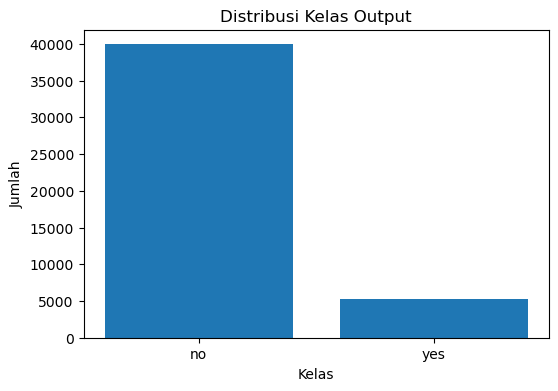

In [18]:
# Menghitung jumlah kelas 'yes' dan 'no'
count_classes = bf['y'].value_counts()
total_samples = count_classes.sum()

# Menghitung persentase kelas 'yes' dan 'no'
percentage_classes = count_classes / total_samples * 100

# Menampilkan jumlah dan persentase kelas 'yes' dan 'no'
print("Jumlah Kelas 'yes':", count_classes['yes'])
print("Jumlah Kelas 'no':", count_classes['no'])
print("Persentase Kelas 'yes':", percentage_classes['yes'].round(2), "%")
print("Persentase Kelas 'no':", percentage_classes['no'].round(2), "%")

# Visualisasi distribusi kelas output menggunakan diagram batang
plt.figure(figsize=(6, 4))
plt.bar(count_classes.index, count_classes.values)
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.title('Distribusi Kelas Output')
plt.show()


# Data Preprocessing

Kita membagi beberapa data menjadi 2 bagian yaitu data train dan data test, karena sebelumnya kita disediakan 4 data yang mana asumsi saya bahwa data yang hanya mengambil 10% dari data asli merupakan data-test. 

In [19]:
#bank additional full
X_train_bad = bad.drop('y', axis=1)
y_train_bad = bad['y']
X_test_bad = badless.drop('y', axis=1)
y_test_bad = badless['y']

In [20]:
#bank full
X_train_bf = bf.drop('y', axis=1)
y_train_bf = bf['y']
X_test_bf = bfless.drop('y', axis=1)
y_test_bf = bfless['y']

Kita lakukan encoding, hal ini digunakan untuk membuat objek encoder. Kemudian, metode fit_transform() digunakan untuk mempelajari pemetaan dari nilai-nilai unik dalam fitur dan mengubah nilai-nilai tersebut menjadi representasi angka.

In [21]:
X_train_encoded = X_train_bad.apply(preprocessing.LabelEncoder().fit_transform)
X_test_encoded = X_test_bad.apply(preprocessing.LabelEncoder().fit_transform)

X_test_encoded.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,12,1,1,2,0,2,0,0,6,0,474,1,20,0,1,3,8,4,156,6
1,21,7,2,3,0,0,0,1,6,0,343,3,20,0,1,8,18,16,207,8
2,7,7,1,3,0,2,0,1,4,4,224,0,20,0,1,9,23,8,225,10
3,20,7,1,2,0,1,1,1,4,0,14,2,20,0,1,9,23,8,222,10
4,29,0,1,6,0,2,0,0,7,1,55,0,20,0,1,7,11,7,201,9


Lalu pada dataset satu lagi saya gunakan One-hot encoding, hal ini dilakukan untuk mengubah variabel kategorikal menjadi sejumlah variabel biner, di mana setiap variabel biner menunjukkan kehadiran atau ketidakhadiran suatu nilai dalam kategori tersebut.

In [22]:
X_train_bf = pd.get_dummies(X_train_bf)
X_test_bf = pd.get_dummies(X_test_bf)
X_test_bf

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4517,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4519,28,1137,6,129,4,211,3,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# Modeling

## Logistic Regression

Logistic Regression digunakan untuk memodelkan hubungan antara variabel input dan probabilitas berlangganan deposito jangka.
Pertama-tama kita panggil model logistic regression, lalu kita latih data train yang telah dilakukan 
encoding

In [23]:
# Membuat objek model Logistic Regression
model = LogisticRegression()

# Melatih model dengan data train yang sudah dikodekan
model.fit(X_train_encoded, y_train_bad)

LogisticRegression()

Lalu kita prediksi menggunakan data test yang telah disediakan

In [24]:
#Memprediksi label untuk data test yang sudah dikodekan
y_pred = model.predict(X_test_encoded)

# Menghitung akurasi
accuracy = accuracy_score(y_test_bad, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 91.31%


In [25]:
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [26]:
cm = confusion_matrix(y_test_bad, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[3586   82]
 [ 276  175]]


In [27]:
accuracy = accuracy_score(y_test_bad, y_pred)
precision = precision_score(y_test_bad, y_pred, pos_label='no')
recall = recall_score(y_test_bad, y_pred, pos_label='no')
f1 = f1_score(y_test_bad, y_pred, pos_label='no')

# Menampilkan hasil metrik evaluasi
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
[[3586   82]
 [ 276  175]]
Accuracy: 91.31%
Precision: 92.85%
Recall: 97.76%
F1-score: 95.25%


Dari hasil confusion matrix yang diperoleh dengan menggunakan logistic regression, dapat diinterpretasikan sebagai berikut:

* True Positive (TP): Terdapat 175 data yang diprediksi sebagai positif dan memang benar-benar positif.
* True Negative (TN): Terdapat 3586 data yang diprediksi sebagai negatif dan memang benar-benar negatif.
* False Positive (FP): Terdapat 276 data yang diprediksi sebagai positif, tetapi sebenarnya negatif (kesalahan prediksi positif palsu).
* False Negative (FN): Terdapat 82 data yang diprediksi sebagai negatif, tetapi sebenarnya positif (kesalahan prediksi negatif palsu).

In [28]:
# Membuat objek model Logistic Regression
model = LogisticRegression()

# Melatih model dengan data train
model.fit(X_train_bf, y_train_bf)



LogisticRegression()

In [29]:
# Memprediksi label untuk data test
y_pred = model.predict(X_test_bf)

# Menghitung akurasi
accuracy = accuracy_score(y_test_bf, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 88.98%


In [30]:
cm = confusion_matrix(y_test_bf, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[3922   78]
 [ 420  101]]


In [31]:
accuracy = accuracy_score(y_test_bf, y_pred)
precision = precision_score(y_test_bf, y_pred, pos_label='no')
recall = recall_score(y_test_bf, y_pred, pos_label='no')
f1 = f1_score(y_test_bf, y_pred, pos_label='no')

# Menampilkan hasil metrik evaluasi
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
[[3922   78]
 [ 420  101]]
Accuracy: 88.98%
Precision: 90.33%
Recall: 98.05%
F1-score: 94.03%


Dari hasil confusion matrix yang diperoleh dengan menggunakan logistic regression, dapat diinterpretasikan sebagai berikut:

* True Positive (TP): Terdapat 101 data yang diprediksi sebagai positif dan memang benar-benar positif.
* True Negative (TN): Terdapat 3922 data yang diprediksi sebagai negatif dan memang benar-benar negatif.
* False Positive (FP): Terdapat 420 data yang diprediksi sebagai positif, tetapi sebenarnya negatif (kesalahan prediksi positif palsu).
* False Negative (FN): Terdapat 78 data yang diprediksi sebagai negatif, tetapi sebenarnya positif (kesalahan prediksi negatif palsu).

## KNN

Selanjutnya yang saya gunakan adalah model KNN dimana model ini menggunakan jarak antara titik data untuk memprediksi label kelas.Pertama-tama seperti biasa kita panggil model kita dan n_neighborsnya kita pakai 5, lalu kita latih model kita

In [32]:
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model dengan data train yang sudah dikodekan
model.fit(X_train_encoded, y_train_bad)

# Memprediksi label untuk data test yang sudah dikodekan
y_pred = model.predict(X_test_encoded)

# Menghitung akurasi
accuracy = accuracy_score(y_test_bad, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 85.72%


In [33]:
cm = confusion_matrix(y_test_bad, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[3275  393]
 [ 195  256]]


In [34]:
accuracy = accuracy_score(y_test_bad, y_pred)
precision = precision_score(y_test_bad, y_pred, pos_label='no')
recall = recall_score(y_test_bad, y_pred, pos_label='no')
f1 = f1_score(y_test_bad, y_pred, pos_label='no')

# Menampilkan hasil metrik evaluasi
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
[[3275  393]
 [ 195  256]]
Accuracy: 85.72%
Precision: 94.38%
Recall: 89.29%
F1-score: 91.76%


Dari hasil confusion matrix yang diperoleh dengan menggunakan logistic regression, dapat diinterpretasikan sebagai berikut:

* True Positive (TP): Terdapat 256 data yang diprediksi sebagai positif dan memang benar-benar positif.
* True Negative (TN): Terdapat 3275 data yang diprediksi sebagai negatif dan memang benar-benar negatif.
* False Positive (FP): Terdapat 195 data yang diprediksi sebagai positif, tetapi sebenarnya negatif (kesalahan prediksi positif palsu).
* False Negative (FN): Terdapat 393 data yang diprediksi sebagai negatif, tetapi sebenarnya positif (kesalahan prediksi negatif palsu).

In [35]:
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model dengan data train yang sudah dikodekan
model.fit(X_train_bf, y_train_bf)

# Memprediksi label untuk data test yang sudah dikodekan
y_pred = model.predict(X_test_bf)

# Menghitung akurasi
accuracy = accuracy_score(y_test_bf, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 91.24%


In [36]:
cm = confusion_matrix(y_test_bf, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[3899  101]
 [ 295  226]]


In [37]:
accuracy = accuracy_score(y_test_bf, y_pred)
precision = precision_score(y_test_bf, y_pred, pos_label='no')
recall = recall_score(y_test_bf, y_pred, pos_label='no')
f1 = f1_score(y_test_bf, y_pred, pos_label='no')

# Menampilkan hasil metrik evaluasi
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
[[3899  101]
 [ 295  226]]
Accuracy: 91.24%
Precision: 92.97%
Recall: 97.47%
F1-score: 95.17%


Dari hasil confusion matrix yang diperoleh dengan menggunakan logistic regression, dapat diinterpretasikan sebagai berikut:

* True Positive (TP): Terdapat 226 data yang diprediksi sebagai positif dan memang benar-benar positif.
* True Negative (TN): Terdapat 3899 data yang diprediksi sebagai negatif dan memang benar-benar negatif.
* False Positive (FP): Terdapat 295 data yang diprediksi sebagai positif, tetapi sebenarnya negatif (kesalahan prediksi positif palsu).
* False Negative (FN): Terdapat 101 data yang diprediksi sebagai negatif, tetapi sebenarnya positif (kesalahan prediksi negatif palsu).

## SVM

Selanjutnya kita gunakan SVM, Mencari hyperplane optimal yang memisahkan data ke dalam kelas yang berbeda, kita lakukan pemanggilan model dan kita latih model kita

In [38]:
# Membuat objek SVM
model = SVC()

# Melatih model dengan data latih
model.fit(X_train_encoded, y_train_bad)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test_encoded)

accuracy = accuracy_score(y_test_bad, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 91.11%


In [39]:
cm = confusion_matrix(y_test_bad, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[3575   93]
 [ 273  178]]


In [40]:
accuracy = accuracy_score(y_test_bad, y_pred)
precision = precision_score(y_test_bad, y_pred, pos_label='no')
recall = recall_score(y_test_bad, y_pred, pos_label='no')
f1 = f1_score(y_test_bad, y_pred, pos_label='no')

# Menampilkan hasil metrik evaluasi
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
[[3575   93]
 [ 273  178]]
Accuracy: 91.11%
Precision: 92.91%
Recall: 97.46%
F1-score: 95.13%


Dari hasil confusion matrix yang diperoleh dengan menggunakan logistic regression, dapat diinterpretasikan sebagai berikut:

* True Positive (TP): Terdapat 178 data yang diprediksi sebagai positif dan memang benar-benar positif.
* True Negative (TN): Terdapat 3575 data yang diprediksi sebagai negatif dan memang benar-benar negatif.
* False Positive (FP): Terdapat 273 data yang diprediksi sebagai positif, tetapi sebenarnya negatif (kesalahan prediksi positif palsu).
* False Negative (FN): Terdapat 93  data yang diprediksi sebagai negatif, tetapi sebenarnya positif (kesalahan prediksi negatif palsu).

In [41]:
# Membuat objek SVM
model = SVC()

# Melatih model dengan data latih
model.fit(X_train_bf, y_train_bf)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test_bf)

# Menghitung akurasi
accuracy = accuracy_score(y_test_bf, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 88.52%


In [42]:
cm = confusion_matrix(y_test_bf, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[3998    2]
 [ 517    4]]


In [43]:
accuracy = accuracy_score(y_test_bf, y_pred)
precision = precision_score(y_test_bf, y_pred, pos_label='no')
recall = recall_score(y_test_bf, y_pred, pos_label='no')
f1 = f1_score(y_test_bf, y_pred, pos_label='no')

# Menampilkan hasil metrik evaluasi
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
[[3998    2]
 [ 517    4]]
Accuracy: 88.52%
Precision: 88.55%
Recall: 99.95%
F1-score: 93.90%


Dari hasil confusion matrix yang diperoleh dengan menggunakan logistic regression, dapat diinterpretasikan sebagai berikut:

* True Positive (TP): Terdapat 4 data yang diprediksi sebagai positif dan memang benar-benar positif.
* True Negative (TN): Terdapat 3998 data yang diprediksi sebagai negatif dan memang benar-benar negatif.
* False Positive (FP): Terdapat 517 data yang diprediksi sebagai positif, tetapi sebenarnya negatif (kesalahan prediksi positif palsu).
* False Negative (FN): Terdapat  2 data yang diprediksi sebagai negatif, tetapi sebenarnya positif (kesalahan prediksi negatif palsu).

## Decision Tree

Selanjutnya mari kita menggunakan Decision Tree, algoritma ini menggunakan pohon keputusan dengan membagi data berdasarkan fitur-fitur yang relevan.

In [44]:

model = DecisionTreeClassifier()

# Melatih model dengan data latih
model.fit(X_train_encoded, y_train_bad)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test_encoded)

accuracy = accuracy_score(y_test_bad, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 89.17%


In [45]:
cm = confusion_matrix(y_test_bad, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[3386  282]
 [ 164  287]]


In [46]:
accuracy = accuracy_score(y_test_bad, y_pred)
precision = precision_score(y_test_bad, y_pred, pos_label='no')
recall = recall_score(y_test_bad, y_pred, pos_label='no')
f1 = f1_score(y_test_bad, y_pred, pos_label='no')

# Menampilkan hasil metrik evaluasi
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
[[3386  282]
 [ 164  287]]
Accuracy: 89.17%
Precision: 95.38%
Recall: 92.31%
F1-score: 93.82%


Dari hasil confusion matrix yang diperoleh dengan menggunakan logistic regression, dapat diinterpretasikan sebagai berikut:

* True Positive (TP): Terdapat 295 data yang diprediksi sebagai positif dan memang benar-benar positif.
* True Negative (TN): Terdapat 3374 data yang diprediksi sebagai negatif dan memang benar-benar negatif.
* False Positive (FP): Terdapat 156 data yang diprediksi sebagai positif, tetapi sebenarnya negatif (kesalahan prediksi positif palsu).
* False Negative (FN): Terdapat 294 data yang diprediksi sebagai negatif, tetapi sebenarnya positif (kesalahan prediksi negatif palsu).

In [47]:

model = DecisionTreeClassifier()

# Melatih model dengan data latih
model.fit(X_train_bf, y_train_bf)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test_bf)

# Menghitung akurasi
accuracy = accuracy_score(y_test_bf, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 100.00%


In [48]:
cm = confusion_matrix(y_test_bf, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[4000    0]
 [   0  521]]


In [49]:
accuracy = accuracy_score(y_test_bf, y_pred)
precision = precision_score(y_test_bf, y_pred, pos_label='no')
recall = recall_score(y_test_bf, y_pred, pos_label='no')
f1 = f1_score(y_test_bf, y_pred, pos_label='no')

# Menampilkan hasil metrik evaluasi
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
[[4000    0]
 [   0  521]]
Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1-score: 100.00%


Dari hasil confusion matrix yang diperoleh dengan menggunakan logistic regression, dapat diinterpretasikan sebagai berikut:

* True Positive (TP): Terdapat 521 data yang diprediksi sebagai positif dan memang benar-benar positif.
* True Negative (TN): Terdapat 4000 data yang diprediksi sebagai negatif dan memang benar-benar negatif.
* False Positive (FP): Terdapat 0 data yang diprediksi sebagai positif, tetapi sebenarnya negatif (kesalahan prediksi positif palsu).
* False Negative (FN): Terdapat 0 data yang diprediksi sebagai negatif, tetapi sebenarnya positif (kesalahan prediksi negatif palsu).

## Random Forest

Selanjutnya mari kita gunakan Random Forest, Kombinasi dari beberapa pohon keputusan (ensemble learning).

In [50]:
model = RandomForestClassifier()

# Melatih model dengan data latih
model.fit(X_train_encoded, y_train_bad)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test_encoded)

# Menghitung akurasi
accuracy = accuracy_score(y_test_bad, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 94.56%


In [51]:
cm = confusion_matrix(y_test_bad, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[3600   68]
 [ 156  295]]


In [52]:
accuracy = accuracy_score(y_test_bad, y_pred)
precision = precision_score(y_test_bad, y_pred, pos_label='no')
recall = recall_score(y_test_bad, y_pred, pos_label='no')
f1 = f1_score(y_test_bad, y_pred, pos_label='no')

# Menampilkan hasil metrik evaluasi
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
[[3600   68]
 [ 156  295]]
Accuracy: 94.56%
Precision: 95.85%
Recall: 98.15%
F1-score: 96.98%


Dari hasil confusion matrix yang diperoleh dengan menggunakan logistic regression, dapat diinterpretasikan sebagai berikut:

* True Positive (TP): Terdapat 290 data yang diprediksi sebagai positif dan memang benar-benar positif.
* True Negative (TN): Terdapat 3616 data yang diprediksi sebagai negatif dan memang benar-benar negatif.
* False Positive (FP): Terdapat 161 data yang diprediksi sebagai positif, tetapi sebenarnya negatif (kesalahan prediksi positif palsu).
* False Negative (FN): Terdapat 52 data yang diprediksi sebagai negatif, tetapi sebenarnya positif (kesalahan prediksi negatif palsu).

In [53]:
model = RandomForestClassifier()

# Melatih model dengan data latih
model.fit(X_train_bf, y_train_bf)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test_bf)

# Menghitung akurasi
accuracy = accuracy_score(y_test_bf, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 100.00%


In [54]:
cm = confusion_matrix(y_test_bf, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[4000    0]
 [   0  521]]


In [55]:
accuracy = accuracy_score(y_test_bf, y_pred)
precision = precision_score(y_test_bf, y_pred, pos_label='no')
recall = recall_score(y_test_bf, y_pred, pos_label='no')
f1 = f1_score(y_test_bf, y_pred, pos_label='no')

# Menampilkan hasil metrik evaluasi
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
[[4000    0]
 [   0  521]]
Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1-score: 100.00%


Dari hasil confusion matrix yang diperoleh dengan menggunakan logistic regression, dapat diinterpretasikan sebagai berikut:

* True Positive (TP): Terdapat 521 data yang diprediksi sebagai positif dan memang benar-benar positif.
* True Negative (TN): Terdapat 4000 data yang diprediksi sebagai negatif dan memang benar-benar negatif.
* False Positive (FP): Terdapat 0 data yang diprediksi sebagai positif, tetapi sebenarnya negatif (kesalahan prediksi positif palsu).
* False Negative (FN): Terdapat 0 data yang diprediksi sebagai negatif, tetapi sebenarnya positif (kesalahan prediksi negatif palsu).

## Naive Bayes

Terakhir kita Naive Bayes, hal ini menggunakan teorema Bayes dengan asumsi bahwa fitur-fitur independen secara bersyarat terhadap kelas target.

In [56]:
model = GaussianNB()
#Melatih model dengan data latih
model.fit(X_train_bf, y_train_bf)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test_bf)

# Menghitung akurasi
accuracy = accuracy_score(y_test_bf, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 84.58%


In [57]:
cm = confusion_matrix(y_test_bf, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[3560  440]
 [ 257  264]]


In [58]:
accuracy = accuracy_score(y_test_bf, y_pred)
precision = precision_score(y_test_bf, y_pred, pos_label='no')
recall = recall_score(y_test_bf, y_pred, pos_label='no')
f1 = f1_score(y_test_bf, y_pred, pos_label='no')

# Menampilkan hasil metrik evaluasi
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
[[3560  440]
 [ 257  264]]
Accuracy: 84.58%
Precision: 93.27%
Recall: 89.00%
F1-score: 91.08%


Dari hasil confusion matrix yang diperoleh dengan menggunakan Naive Bayes, dapat diinterpretasikan sebagai berikut:

* True Positive (TP): Terdapat 264 data yang diprediksi sebagai positif dan memang benar-benar positif.
* True Negative (TN): Terdapat 3560 data yang diprediksi sebagai negatif dan memang benar-benar negatif.
* False Positive (FP): Terdapat 257 data yang diprediksi sebagai positif, tetapi sebenarnya negatif (kesalahan prediksi positif palsu).
* False Negative (FN): Terdapat 440 data yang diprediksi sebagai negatif, tetapi sebenarnya positif (kesalahan prediksi negatif palsu).

In [59]:
model = GaussianNB()
# Melatih model dengan data latih
model.fit(X_train_encoded, y_train_bad)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test_encoded)

# Menghitung akurasi
accuracy = accuracy_score(y_test_bad, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 75.41%


In [60]:
cm = confusion_matrix(y_test_bad, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2783  885]
 [ 128  323]]


In [61]:
accuracy = accuracy_score(y_test_bad, y_pred)
precision = precision_score(y_test_bad, y_pred, pos_label='no')
recall = recall_score(y_test_bad, y_pred, pos_label='no')
f1 = f1_score(y_test_bad, y_pred, pos_label='no')

# Menampilkan hasil metrik evaluasi
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
[[2783  885]
 [ 128  323]]
Accuracy: 75.41%
Precision: 95.60%
Recall: 75.87%
F1-score: 84.60%


Dari hasil confusion matrix yang diperoleh dengan menggunakan Naive Bayes, dapat diinterpretasikan sebagai berikut:

* True Positive (TP): Terdapat 323 data yang diprediksi sebagai positif dan memang benar-benar positif.
* True Negative (TN): Terdapat 2783 data yang diprediksi sebagai negatif dan memang benar-benar negatif.
* False Positive (FP): Terdapat 128 data yang diprediksi sebagai positif, tetapi sebenarnya negatif (kesalahan prediksi positif palsu).
* False Negative (FN): Terdapat 885 data yang diprediksi sebagai negatif, tetapi sebenarnya positif (kesalahan prediksi negatif palsu).

## Kesimpulan

Kesimpulan

Untuk Bank Additional Full 
1. Proporsi Orang yang memiliki kredit macet
Orang yang tidak mengalami kredit macet ada sekitar 79%
Orang yang tidak tahu bahwa kredit macet sekitar 20%
Orang yang mengalami kredit macet 0.0073% yang mengalami kredit macet
2.  Mayoritas orang masih memiliki pinjaman perumahan
3. Sedangkan untuk pinjaman pribadi banyak yang tidak memilikinya
4. Distribusi Kelas Output target, tidak terlalu seimbang
5. Modeling 

Logistic Regression

1. Accuracy: 91.31%
2. Precision: 92.85%
3. Recall: 97.76%
4. F1-score: 95.25%

KNN
1. Accuracy: 85.72%
2. Precision: 94.38%
3. Recall: 89.29%
4. F1-score: 91.76%

SVM
1. Accuracy: 91.11%
2. Precision: 92.91%
3. Recall: 97.46%
4. F1-score: 95.13%

Decision Tree
1. Accuracy: 89.17%
2. Precision: 95.30%
3. Recall: 92.39%
4. F1-score: 93.83%

Random Forest
1. Accuracy: 94.39%
2. Precision: 95.86%
3. Recall: 97.93%
4. F1-score: 96.88%

Naive Bayes
1. Accuracy: 75.41%
2. Precision: 95.60%
3. Recall: 75.87%
4. F1-score: 84.60%


Untuk Bank Full 
1. Berikut Proporsi yang mengalami kredit macet 
Orang yang tidak mengalami kredit macet ada sekitar 98%
Orang yang mengalami kredit macet 2% yang mengalami kredit macet
2.  Mayoritas orang masih memiliki pinjaman perumahan
3. Sedangkan untuk pinjaman pribadi banyak yang tidak memilikinya
4. Distribusi Kelas Output target, tidak terlalu seimbang
5. Modelling

Logistic Regression
1. Accuracy: 88.98%
2. Precision: 90.33%
3. Recall: 98.05%
4. F1-score: 94.03%

KNN
1. Accuracy: 91.24%
2. Precision: 92.97%
3. Recall: 97.47%
4. F1-score: 95.17%

SVM
1. Accuracy: 88.52%
2. Precision: 88.55%
3. Recall: 99.95%
4. F1-score: 93.90%

Decision Tree
1. Accuracy: 100.00%
2. Precision: 100.00%
3. Recall: 100.00%
4. F1-score: 100.00%

Random Forest
1. Accuracy: 100.00%
2. Precision: 100.00%
3. Recall: 100.00%
4. F1-score: 100.00%

Naive Bayes
1. Accuracy: 84.58%
2. Precision: 93.27%
3. Recall: 89.00%
4. F1-score: 91.08%


Untuk Akurasi tentunya Random Forest adalah model terbaik dikarenakan akurasi yang tinggi dibanding yang lain, untuk menjawab hal ini saya memilih Presisi karena presisi mengukur sejauh mana model dapat memprediksi dengan benar bahwa seorang klien akan berlangganan deposito jangka. Presisi yang tinggi berarti bahwa sebagian besar prediksi positif yang dilakukan oleh model adalah benar.

Hal ini penting bagi bank karena mereka ingin mengoptimalkan upaya pemasaran dan kampanye untuk menarik nasabah yang berpotensi berlangganan deposito jangka. Dengan presisi yang tinggi, bank dapat lebih yakin bahwa upaya mereka akan mencapai target yang diinginkan dan tidak membuang-buang sumber daya untuk menargetkan nasabah yang tidak tertarik atau tidak memenuhi syarat.